# GIỚI THIỆU 

# 1. Summary


# 2. Tải và khám phá tập dữ liệu

## 2.1. Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy.stats import norm
from scipy import stats
from scipy.stats import skew
import sklearn
import warnings
warnings.filterwarnings('ignore')

## 2.2. Tải dữ liệu từ file csv
Nguồn dữ liệu https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv

In [2]:
path = './house_input'
df_train = pd.read_csv(path+'/train.csv')
df_test = pd.read_csv(path+'/test.csv')
print ("Data is loaded!")

Data is loaded!


## 2.3. Data Size and Structure

In [3]:
print ("Train: ", df_train.shape[0], "hàng, và ", df_train.shape[1], "cột")
print ("Test: ", df_test.shape[0], "hàng, và ", df_test.shape[1], "cột")

Train:  1460 hàng, và  81 cột
Test:  1459 hàng, và  80 cột


Tập dữ liệu train bao gồm 81 cột và 1460 hàng. Chúng ta có thể quan sát 1 phần tập dữ liệu bằng cách in ra một số hàng đầu tiên:

### Train

In [4]:
# Hiển thị 5 hàng đầu tiên của tập train
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Test

In [5]:
# Hiển thị 5 hàng đầu tiên của tập test
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Loại bỏ cột `Id` vì nó không cần thiết cho việc huấn luyện mô hình.

In [6]:
# Lưu cột Id
train_ID = df_train['Id']
test_ID = df_test['Id']

# Bỏ cột 'Id' vì nó không cần thiết cho quá trình dự đoán.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

# Kiểm tra lại kích thước dữ liệu sau khi loại bỏ cột 'Id'
print("\nKích thước tập train sau khi loại bỏ cột Id là : {} ".format(df_train.shape)) 
print("Kích thước tập train sau khi loại bỏ cột Id là : {} ".format(df_test.shape))


Kích thước tập train sau khi loại bỏ cột Id là : (1460, 80) 
Kích thước tập train sau khi loại bỏ cột Id là : (1459, 79) 


Có 79 thuộc tính. Bằng cách sử dụng những thuộc tính này, mô hình phải đự đoán giá bán của căn nhà - được biểu thị bằng cột `SalePrice`.

Chúng ta có thể kiểm tra các thuộc tính đó như sau:

In [7]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

In [10]:
# Định lượng
quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [11]:
# Định tính
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

Có 1460 trường dữ liệu train và 1459 trường dữ liệu test. Tổng số thuộc tính là 80, trong đó có 36 thuộc tính định lượng, 43 thuộc tính định tính (phân loại)  và SalePrice.

* Định lượng(Quantitative): 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

* Định tính(Qualitative): Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

# 3. Exploratory Data Analysis – Phân tích Khám phá Dữ liệu

Mục tiêu:  
- Mỗi hàng trong tập dữ liệu mô tả các đặc điểm của một ngôi nhà.
- Mục tiêu của chúng tôi là dự đoán Giá bán `SalePrice` dựa trên các tính năng này.

## 3.1. Biến mục tiêu (target variable): SalePrice

Đầu tiên, xem giá nhà được phân bố như thế nào:

In [12]:
print(df_train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Giá nhà trung bình là 180921.195890 </br>
Độ lệch chuẩn (căn bậc 2 phương sai) 79442.502883 cho thấy xung quanh giá trị trung bình có sự dao động khá lớn </br>

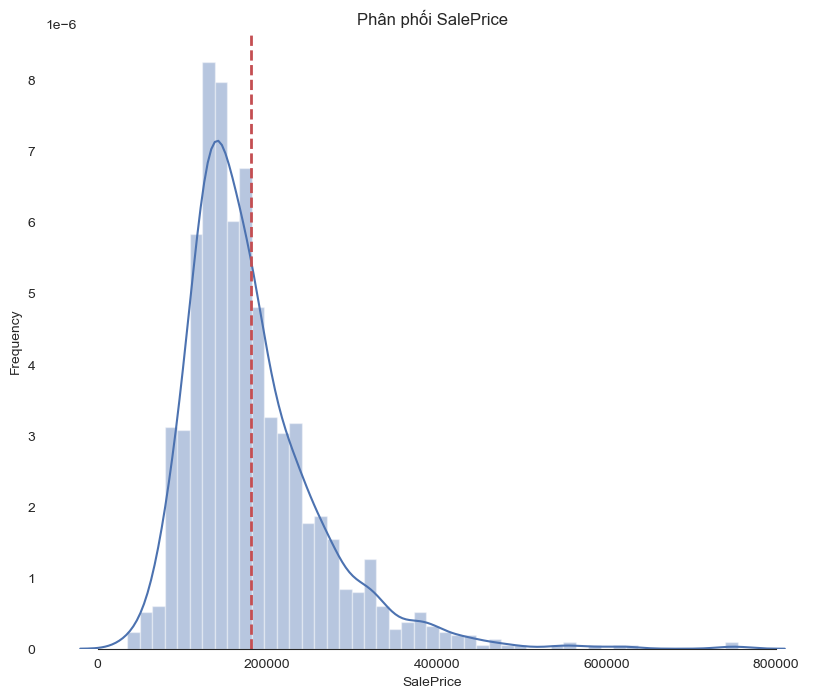

In [13]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(10, 8))

# Kiểm tra phân phối 
sns.distplot(df_train['SalePrice'], color="b");
ax.axvline(x=df_train['SalePrice'].mean(), color="r", linestyle='--', linewidth=2)  # Vẽ đường dọc tại giá trị trung bình
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="Phân phối SalePrice")
sns.despine(trim=True, left=True)
plt.show()

In [14]:
# Skew và kurt
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Một số ghi chú từ quan sát phân phối:

* Độ lệch khỏi phân phối chuẩn (normal distribution).
* Có độ lệch chéo dương đáng kể (positive skewness).
* Thể hiện đỉnh cao (show peakedness).

Ta có thể thấy rằng giá bị lệch phải và một số giá trị ngoại lệ nằm trên ~500.000. Vì các mô hình (tuyến tính) ưu tiên dữ liệu được phân phối chuẩn, nên chúng ta cần chuyển đổi biến `SalePrice` này và làm cho nó được phân phối chuẩn hơn.

## 3.2. Các thuộc tính đầu vào (Features)

Ở phần này, ta sẽ xem xét sự phân bố giá trị của các thuộc tính đặc trưng </br>
Đầu tiên ta cần liệt kê các loại dữ liệu của các cột và tập các thuộc tính loại số

In [15]:
list(set(df_train.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [16]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Có 37 biến số (numeric variable). Ta sẽ vẽ biểu đồ phân phối giá trị cho tất cả các biến số này

In [17]:
colors = ["#bfd3e6", "#9b5b4f", "#4e4151", "#dbba78", "#bb9c55", "#909195","#dc1e1e","#a02933","#716807","#717cb4"]
df_train.describe().T.style.bar(subset=['mean'],color=colors[3]).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000
BsmtFinSF2,1460.000000,46.549315,161.319273,0.000000,0.000000,0.000000,0.000000,1474.000000


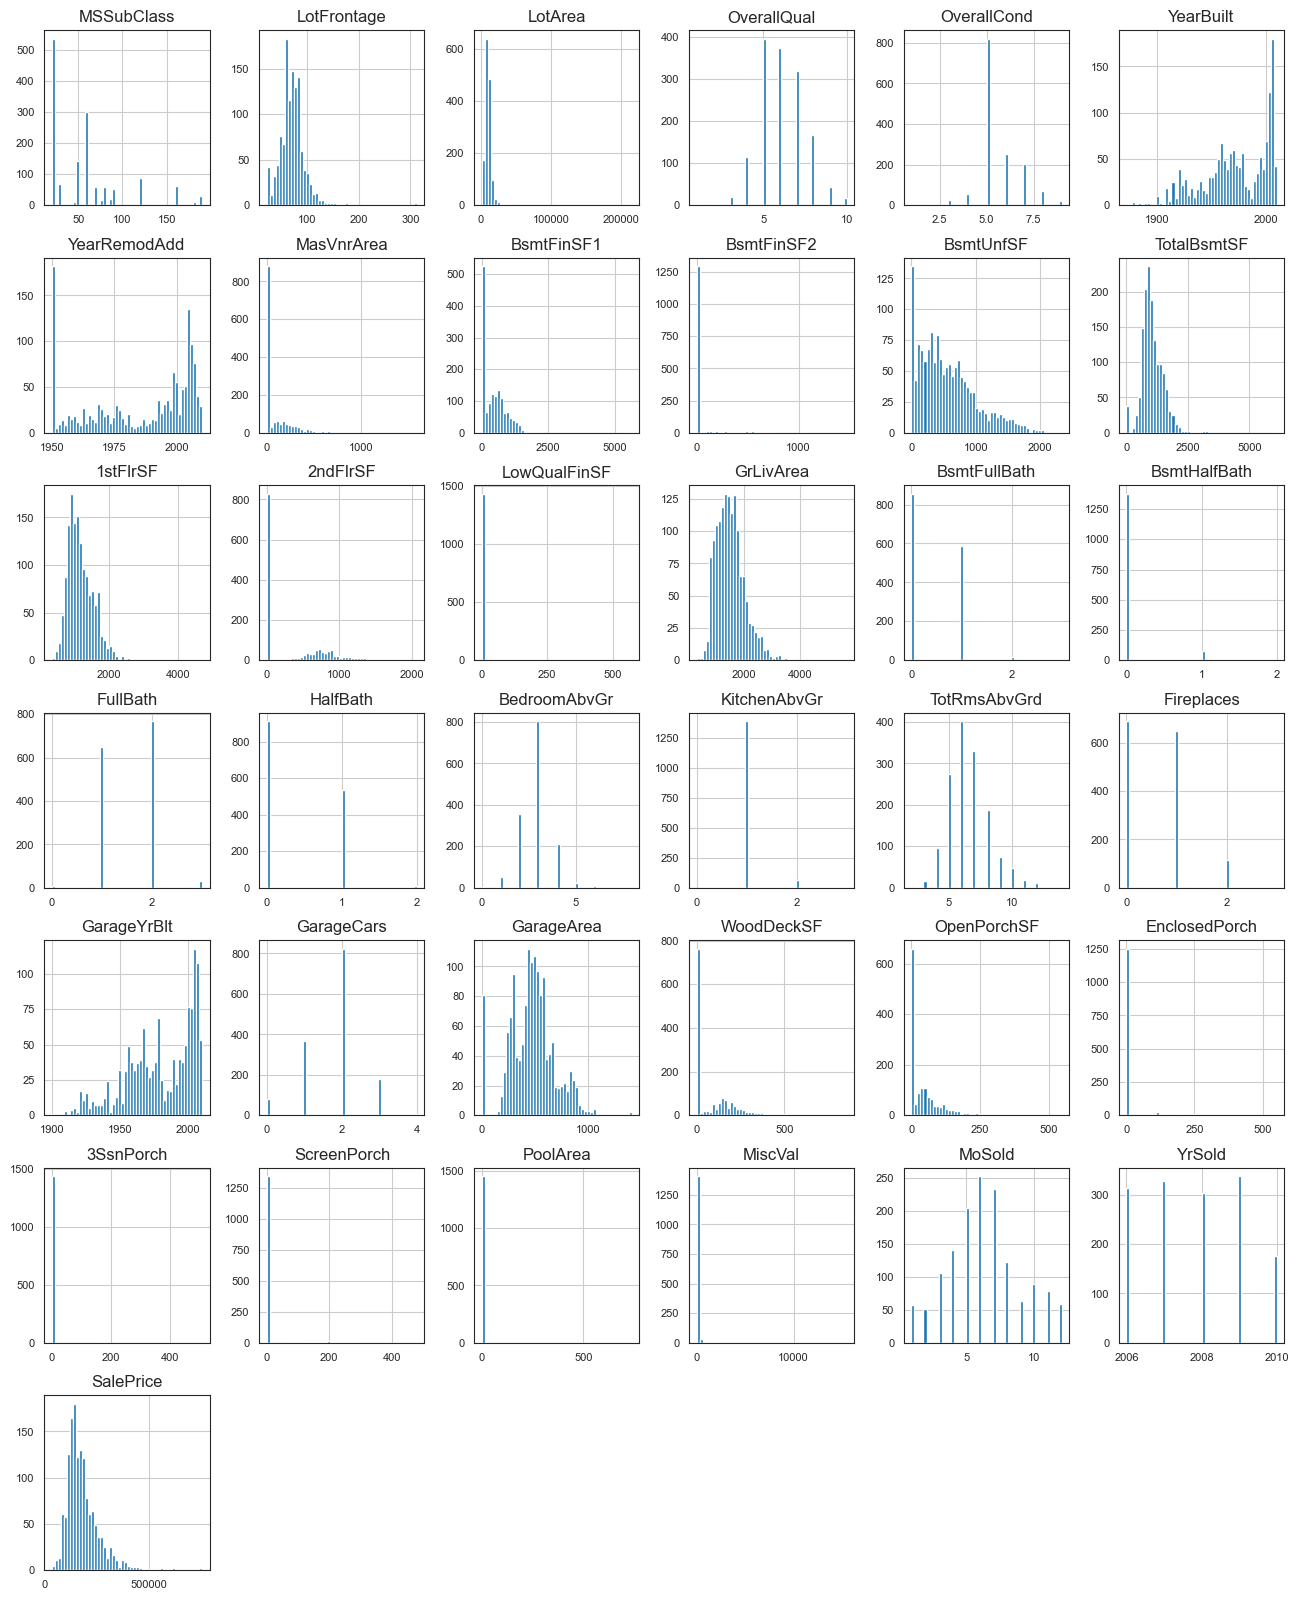

In [18]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Các thuộc tính như `1stFlrSF`, `TotalBsmtSF`, `LotFrontage`, `GrLiveArea`... có phân phối giá trị giống với nhau và giống với mục tiêu `SalePrice`. Ta sẽ thử tìm hiểu sự tương quan giữa các biến này với biến mục tiêu

## 3.3. Sự tương quan (Correlation)

Ta sẽ tìm những thuộc tính nào có mối tương quan chặt chẽ với `SalePrice`.

Vẽ Correlation matrix để biểu diễn mối tương quan giữa các thuộc tính với nhau và với `SalePrice`

<AxesSubplot:>

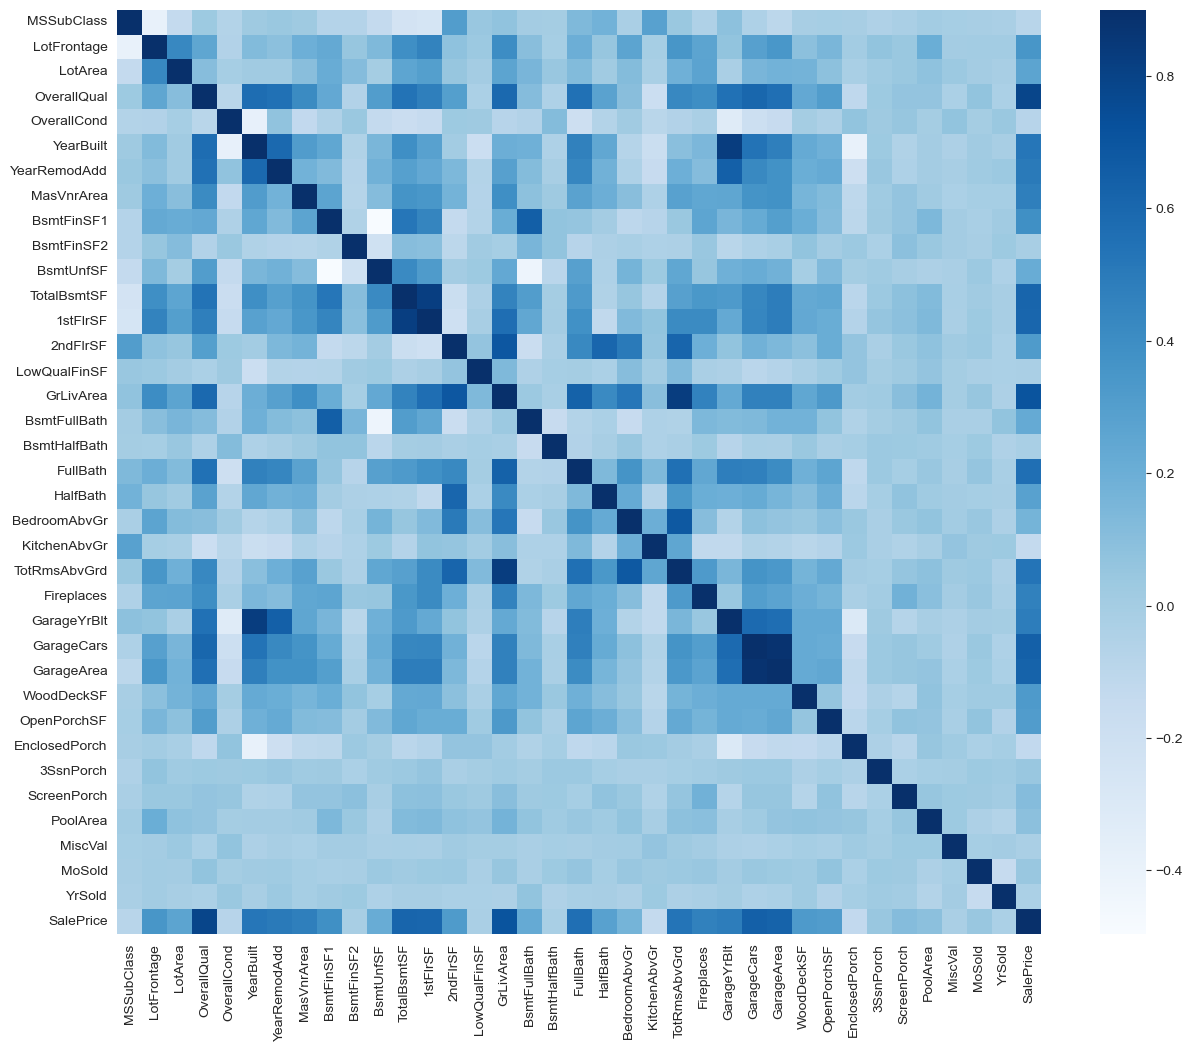

In [19]:
corr = df_num.corr()
plt.subplots(figsize=(15,12))
#sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True,annot=True)
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

Chúng ta lưu những thuộc tính có mối tương quan mạnh với `SalePrice` vào một biến có tên là `golden_features_list`

In [20]:
df_num_corr = corr['SalePrice'][:-1] # Lấy dòng 'SalePrice' bỏ ô cuối
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("Có {} giá trị tương quan chặt chẽ với SalePrice ( độ tương quan từ 50% trở lên ):\n{}".format(len(golden_features_list), golden_features_list))

Có 10 giá trị tương quan chặt chẽ với SalePrice ( độ tương quan từ 50% trở lên ):
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Hoặc có thể biểu diễn cách trực quan bằng ma trận tương quan:

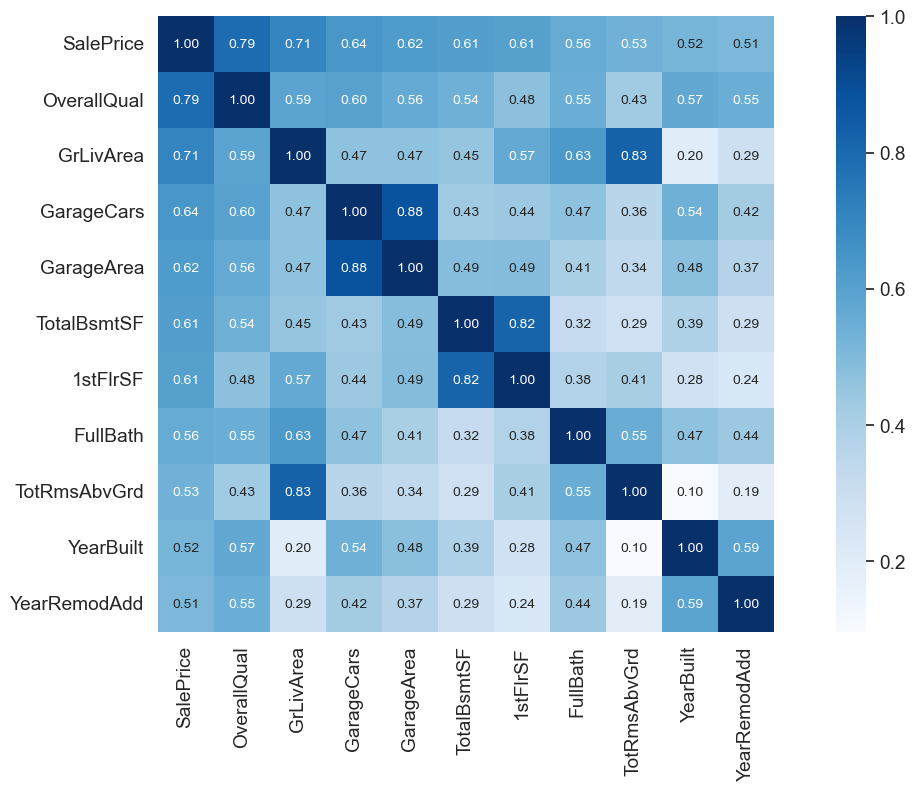

In [21]:
k = 11  # number of variables/features + SalePrice
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
plt.rcParams["figure.figsize"] = (16,8)
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='Blues')
plt.show()

* Ta thấy 2 biến 'TotalBsmtSF' và '1stFlrSF' có độ tương quan cao với nhau. Có thể hiểu bởi việc cả hai đại diện cho các không gian sống chính của ngôi nhà là tầng hầm và tầng trệt, và thường có kích thước tương tự nhau.
* Tuy Các biến GarageX(liên quan Garage - GarageArea, GarageCars) cũng có độ tương quan cao với nhau nhưng đều cung cấp thông tin tương tự nhau dẫn đến multicollinearity (đa cộng tuyến) </br> Mối tương quan giữa GarageCars và GarageArea rất cao (0.88), và cả hai đều có mối tương quan tương tự (cao) với SalePrice. Tuy nhiên, số xe có thể vừa với diện tích garage là hệ quả của diện tích garage. 'GarageCars' và 'GarageArea' giống như hai anh em sinh đôi. Ta sẽ không thể phân biệt được chúng. Ta sẽ giữ 'GarageCars' vì mối tương quan của nó với 'Saleprice' cao hơn GarageArea , bỏ cột GarageArea.

Multicollinearity có thể gây khó khăn trong việc xây dựng mô hình dự đoán chính xác vì nó làm phát sinh vấn đề trong việc ước lượng các hệ số của mô hình.

Các biến số khác có mối tương quan cao hơn 0.5 với SalePrice là:  
- TotalBsmtSF: Tổng diện tích tầng hầm   
- 1stFlrSF: Diện tích tầng một   
- FullBath: Phòng tắm đầy đủ phía trên mặt đất   
- TotRmsAbvGrd: Tổng số phòng phía trên mặt đất (không bao gồm phòng tắm)   
- YearBuilt: Ngày xây dựng ban đầu   
- YearRemodAdd: Ngày cải tạo (cùng với ngày xây dựng nếu không có cải tạo hoặc thêm vào)

Trong phần còn lại của mục này, chúng ta sẽ trực quan hóa mối quan hệ giữa `SalePrice` và hai yếu tố dự đoán có mối tương quan cao nhất với `SalePrice`; Chất lượng tổng thể (`OverallQual`) và Diện tích sống (`GrLivArea`) (phần này là tỷ lệ của ngôi nhà không nằm trong tầng hầm).

* ### Chất lượng tổng thể (`OverallQual`)

Chất lượng tổng thể có mối tương quan với SalePrice cao nhất trong số các biến số (0,79). Nó đánh giá vật liệu tổng thể và độ hoàn thiện của ngôi nhà theo thang điểm từ 1 (rất kém) đến 10 (rất xuất sắc).

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

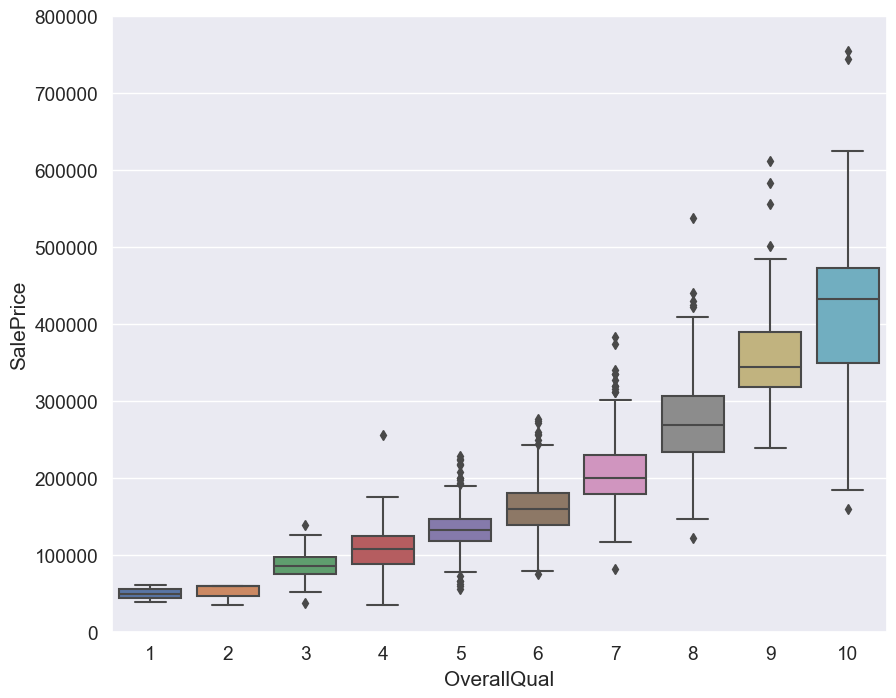

In [22]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Mối tương quan tích cực (positive) chắc chắn là có và dường như là một đường cong hơi hướng lên trên. Về các ngoại lệ, chúng tôi không thấy bất kỳ giá trị cực đoan nào. Nếu sau này có ứng cử viên nào được đưa ra làm ngoại lệ (outlier) thì có vẻ đó là nhà với số điểm 4. </br>
Với sự tăng của 'OverallQual', giá trung vị và phạm vi giá bán cũng có xu hướng tăng theo. Điều này cho thấy một mối quan hệ tương đối tích cực giữa chất lượng nhà và giá bán. </br>
Sự phân tán của dữ liệu: IQR mở rộng và sự xuất hiện của ngoại lệ tăng lên với các nhóm chất lượng cao, cho thấy có sự phân tán lớn hơn trong giá bán của nhà có chất lượng cao. </br>
Ta thấy nếu OverallQual hay chất lượng tổng thể càng cao hay nhà càng được đánh giá cao thì giá nhà SalePrice càng cao

* ### Diện tích sinh hoạt trên mặt đất (`GrLivArea`)

Biến số có mối tương quan cao thứ hai với SalePrice là Khu vực sinh hoạt trên mặt đất. Rõ ràng, những ngôi nhà lớn thường đắt hơn.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x600 with 0 Axes>

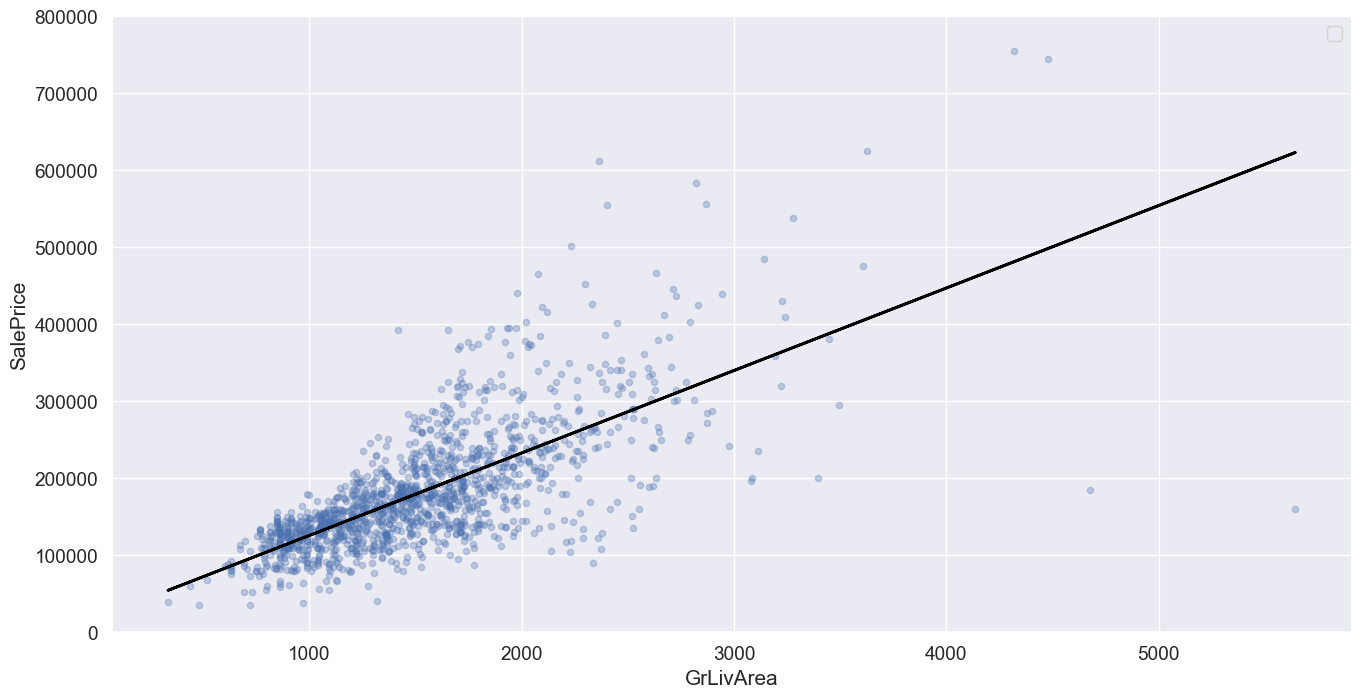

In [23]:
# Tạo DataFrame
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)

# Vẽ biểu đồ phân tán
plt.figure(figsize=(10, 6))  # Kích thước tùy chọn
ax = data.plot.scatter(x='GrLivArea', y='SalePrice', alpha=0.3, ylim=(0,800000))

# Tính toán hồi quy tuyến tính
x = data['GrLivArea']
y = data['SalePrice']
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

# Vẽ đường tuyến tính
plt.plot(x, m*x + c, 'black', linewidth=2)

# Thêm chú thích và hiển thị biểu đồ
plt.legend()
plt.show()


Đặc biệt ở đây có hai căn nhà với khu vực sinh hoạt rất rộng và giá bán thấp, có vẻ như là những điểm ngoại lệ. Chúng tôi sẽ chưa loại bỏ chúng ngay bây giờ, vì loại bỏ các điểm ngoại lệ có thể rất nguy hiểm. Chẳng hạn, điểm số thấp về Chất lượng Tổng thể có thể giải thích giá thấp. Tuy nhiên, điểm số Chất lượng Tổng thể cũng có thể cao. Do đó, chúng tôi sẽ tiếp tục để ý đến 2 căn nhà và xem đây là những ứng cử viên hàng đầu để loại bỏ như là các điểm ngoại lệ.

* ### Một vài thuộc tính khác

YearBuilt : Năm xây dựng của ngôi nhà

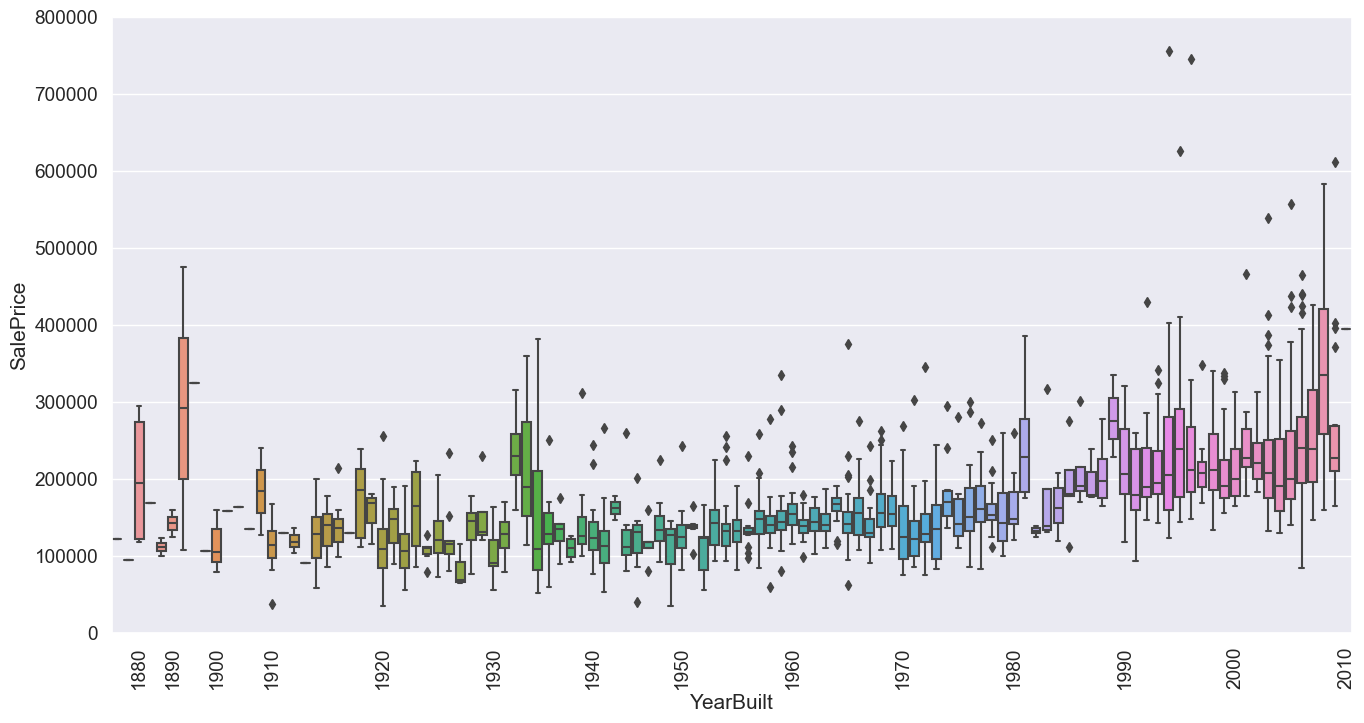

In [24]:
# Tạo DataFrame
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
# Vẽ biểu đồ
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

# Điều chỉnh các nhãn trên trục x
# Chỉ hiển thị mỗi năm đầu tiên của mỗi thập kỷ
start_year = 1870
end_year = 2010
step = 10
ticks = [year for year in range(start_year, end_year + 1, step)]
labels = [str(year) if year in ticks else '' for year in sorted(data['YearBuilt'].unique())]

plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)  # Xoay nhãn để dễ đọc hơn

plt.show()

Mặc dù không phải là một xu hướng mạnh mẽ, nhưng ta thấy 'SalePrice' có xu hướng tăng với các mẫu có mới hơn là các ngôi nhà được xây từ lâu

TotalBsmtSF: Total square feet of basement area -  Tổng diện tích của khu vực tầng hầm tính bằng feet vuông.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Hệ số tương quan giữa SalePrice và TotalBsmtSF  0.6135805515591954


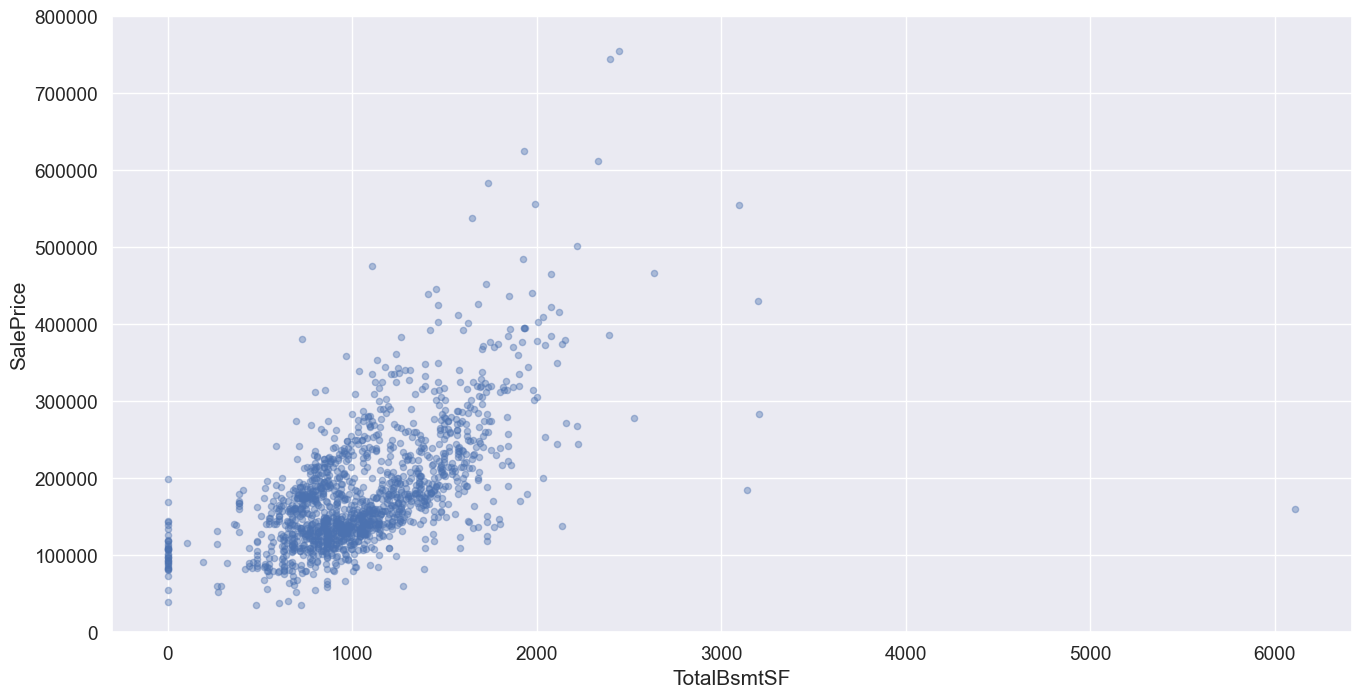

In [25]:
var = 'TotalBsmtSF'
print(f'Hệ số tương quan giữa SalePrice và {var} ',df_train['SalePrice'].corr(df_train[var]))
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', alpha=0.4, ylim=(0,800000));
#data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Hệ số tương quan giữa SalePrice và FullBath  0.5606637627484453


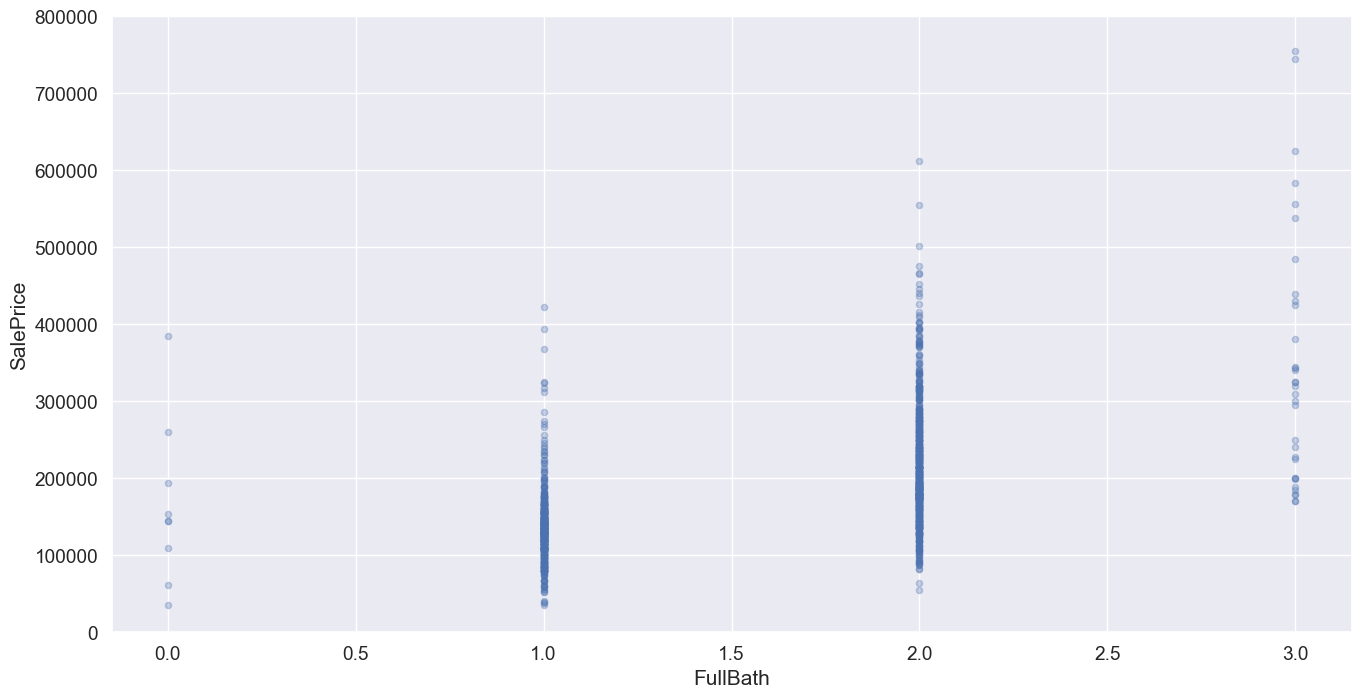

In [26]:
var = 'FullBath'
print(f'Hệ số tương quan giữa SalePrice và {var} ',df_train['SalePrice'].corr(df_train[var]))
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha=0.3, ylim=(0,800000));

Các giá trị SalePrice phân tán khá rộng, đặc biệt là ở các giá trị FullBath cao hơn, điều này có thể cho thấy rằng giá nhà không chỉ phụ thuộc vào số lượng phòng tắm mà còn vào nhiều yếu tố khác. </br>
FullBath có ý nghĩa trong việc dự đoán SalePrice và có thể giúp cải thiện độ chính xác của mô hình dự đoán khi kết hợp với các biến khác.

# 4. Feature Engineering 

## 4.1. Xử lý ngoại lệ (Outliers)

Ở phần này, ta sẽ xem xét sự phân bố giá trị của các thuộc tính đặc trưng
Từ mục 3.3, ta có thể một số ngoại lệ (Outlier) ở các OverallQual/SalePrice và GrLivArea/SalePrice. 

In [27]:
# Loại bỏ các ngoại lệ
df_train.drop(df_train[(df_train['OverallQual']<5) & (df_train['SalePrice']>200000)].index, inplace=True)
df_train.drop(df_train[(df_train['GrLivArea']>4500) & (df_train['SalePrice']<300000)].index, inplace=True)
df_train.reset_index(drop=True, inplace=True)

Kiểm tra lại sau khi loại bỏ các outlier

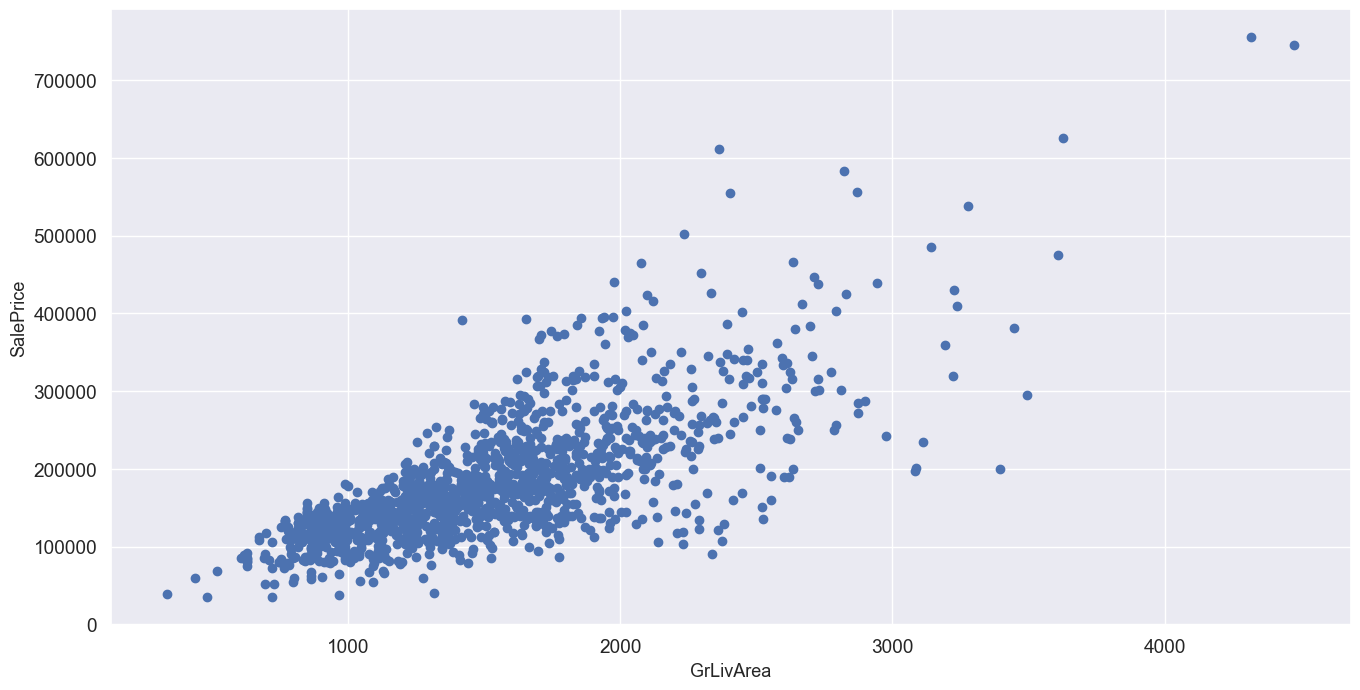

In [28]:
#Vẽ lại GrLivArea/SalePrice
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## 4.2. Log Transformation

Như đã phân tích ở mục 3.1, `SalePrice` bị lệch sang phải. Đây là một vấn đề, vì hầu hết các mô hình ML không hoạt động tốt với dữ liệu không được phân phối chuẩn. Chúng ta phi tuyến tính hóa cho biến mục tiêu bằng cách áp dụng biến đổi `log(1+x)` (logarit tự nhiên cơ số e)  để giảm độ lệch của phân phối và làm cho dữ liệu gần với phân phối chuẩn hơn, giúp cải thiện hiệu suất của các mô hình dự đoán .

In [29]:
# log(1+SalePrice) transform
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

Biểu đồ phân phối giá trị của SalePrice


 Giá trị trung bình μ hay mu = 12.02 và độ lệch chuẩn của phân phối σ hay sigma = 0.40



Text(0.5, 1.0, 'SalePrice distribution')

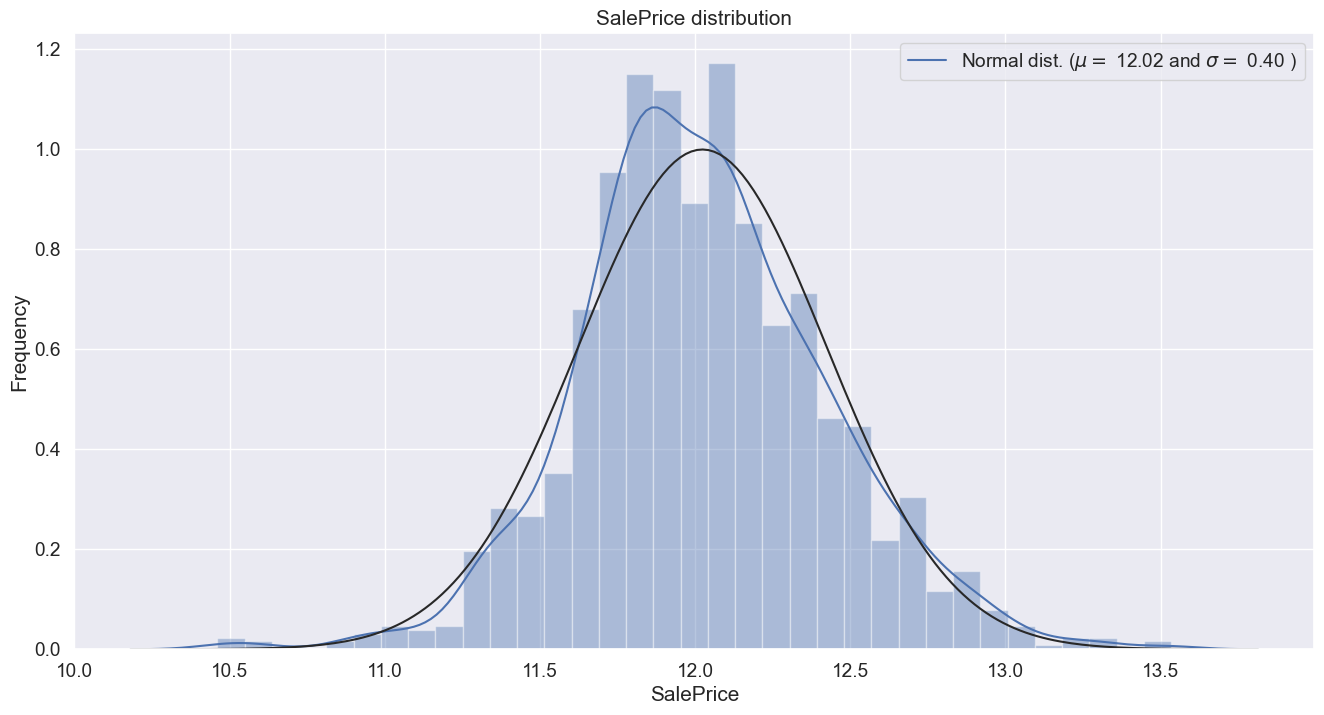

In [30]:
#Kiểm tra phân phối mới 
# xanh dương - đường cong phân phối chuẩn (normal distribution) để so sánh phân phối của dữ liệu đã biến đổi với phân phối chuẩn.
sns.distplot(df_train['SalePrice'] , fit=norm); 
# Lấy các tham số phù hợp được sử dụng
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n Giá trị trung bình μ hay mu = {:.2f} và độ lệch chuẩn của phân phối σ hay sigma = {:.2f}\n'.format(mu, sigma))

# Vẽ đồ thị phân phối
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

* Đường cong xanh dương :Ta thấy thấy rằng dữ liệu sau khi biến đổi có phân phối gần giống với phân phối chuẩn. 
* Đường cong đen: hân phối thực tế của dữ liệu SalePrice sau khi biến đổi log. Nó cho thấy tần suất xuất hiện của các giá trị SalePrice đã biến đổi.

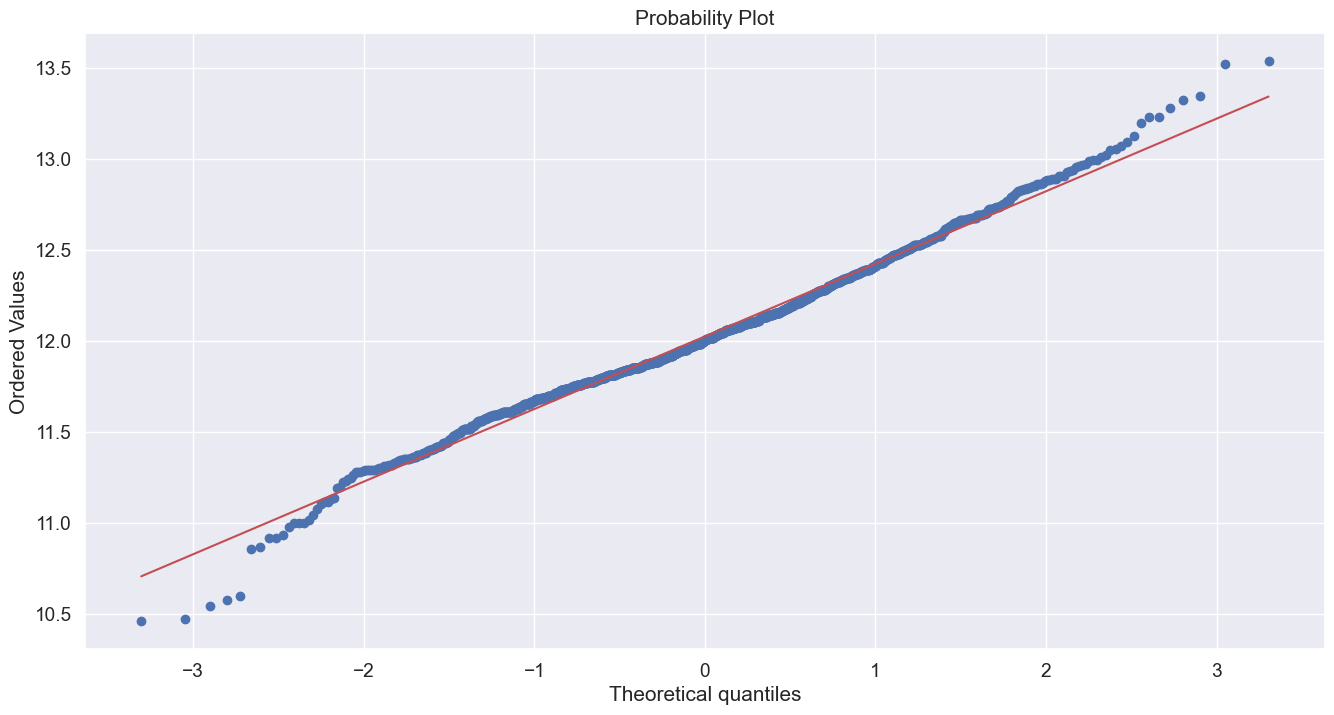

In [31]:
#Get also the QQ-plot  (Quantile-Quantile plot)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

QQ-plot này cho thấy rằng sau khi áp dụng phép biến đổi log(1+SalePrice), phân phối của biến SalePrice gần với phân phối chuẩn . 
Các điểm xanh (SalePrice) nằm hầu như trên trục đỏ (phân phối chuẩn) . Ở 2 đầu đồ thị có 1 vài điểm ngoại lệ lệch khỏi đường thẳng đỏ nhưng không ảnh hưởng nhiều đến phân phối tổng thể.

Nối dữ liệu train và dữ liệu test trong cùng một dataframe có tên là `all_data`

In [32]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("size của all_data là: {}".format(all_data.shape))


size của all_data là: (2916, 79)


In [33]:
all_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## 4.3. Missing Data and Imputation

### 4.3.1. Kiểm tra Missing Data

In [34]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691358
MiscFeature,96.399177
Alley,93.209877
Fence,80.418381
FireplaceQu,48.696845
LotFrontage,16.632373
GarageFinish,5.452675
GarageQual,5.452675
GarageCond,5.452675
GarageYrBlt,5.452675


Text(0.5, 1.0, 'Percent missing data by feature')

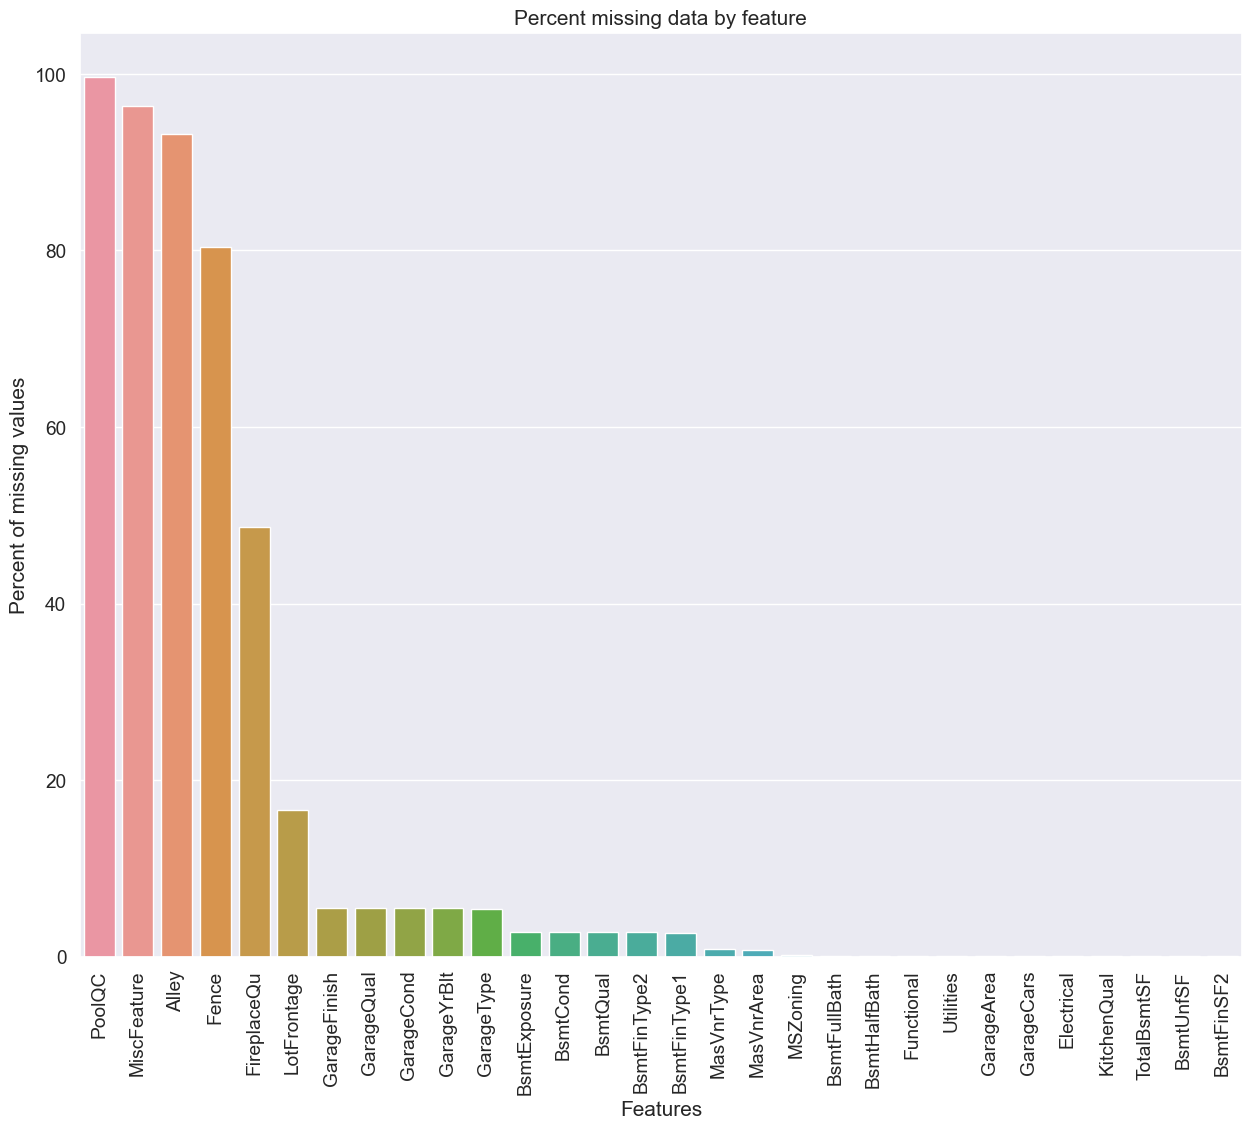

In [35]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=90)
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### 4.3.2. Imputing Missing Data

Chúng tôi impute chúng bằng cách tiến hành tuần tự các thuộc tính có giá trị bị thiếu

* `PoolQC`: mô tả dữ liệu cho biết NA có nghĩa là "Không có hồ". Điều đó hợp lý với tỷ lệ giá trị còn thiếu rất lớn (+99%) và phần lớn các ngôi nhà nói chung không có Hồ bơi.

In [36]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

* `MiscFeature`: mô tả dữ liệu cho biết NA có nghĩa là "không có tính năng thêm"

In [37]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

* `Alley` : mô tả dữ liệu cho biết NA có nghĩa là "không có ngõ vào"

In [38]:
all_data["Alley"] = all_data["Alley"].fillna("None")

* `Fence`: mô tả dữ liệu cho biết NA có nghĩa là "không có hàng rào"

In [39]:
all_data["Fence"] = all_data["Fence"].fillna("None")

* `FireplaceQu`: mô tả dữ liệu cho biết NA có nghĩa là "không có lò sưởi"

In [40]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

* `LotFrontage` : Vì diện tích của mỗi con đường nối với ngôi nhà có thể có diện tích tương tự với các ngôi nhà khác trong vùng lân cận của nó, nên chúng ta có thể điền các giá trị còn thiếu bằng LotFrontage trung bình của vùng lân cận.

In [41]:
# Nhóm theo vùng lân cận và điền giá trị còn thiếu theo LotFrontage trung bình của tất cả vùng lân cận
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

* `GarageType`, `GarageFinish`, `GarageQual` và `GarageCond` : Thay thế dữ liệu bị thiếu bằng None

In [42]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

* `GarageYrBlt`, `GarageArea` và `GarageCars` : Thay thế dữ liệu bị thiếu bằng 0 (Vì Không có gara = không có ô tô trong gara)

In [43]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

* `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `BsmtFullBath` và `BsmtHalfBath` : các giá trị bị thiếu có thể bằng 0 vì không có tầng hầm

In [44]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

* `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1` và `BsmtFinType2` : Đối với tất cả các tính năng phân loại liên quan đến tầng hầm này, NaN có nghĩa là không có tầng hầm.

In [45]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

* `MasVnrArea` và `MasVnrType` : NA rất có thể có nghĩa là không có lớp vữa xây cho những ngôi nhà này. Chúng ta có thể điền 0 cho vùng (area) và None cho loại (type).

In [46]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

* `MSZoning` (Phân loại phân vùng chung): 'RL' cho đến nay là giá trị phổ biến nhất. Vì vậy chúng ta có thể điền vào các giá trị còn thiếu bằng 'RL'

In [47]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [48]:
utilities_counts = all_data['Utilities'].value_counts()
# Hiển thị kết quả
print(utilities_counts)

AllPub    2913
NoSeWa       1
Name: Utilities, dtype: int64


* `Utilities` : Đối với tính năng phân loại này, tất cả các bản ghi đều là "AllPub", ngoại trừ một "NoSeWa" và 2 NA. Vì ngôi nhà có 'NoSewa' nằm trong tập huấn luyện nên tính năng này sẽ không giúp ích gì trong việc lập mô hình dự đoán. Sau đó chúng ta có thể loại bỏ nó một cách an toàn.

In [49]:
all_data = all_data.drop(['Utilities'], axis=1)


* `Functional`: mô tả dữ liệu cho biết NA có nghĩa là typical

In [50]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

* `Electrical`: Nó có một giá trị NA. Vì tính năng này chủ yếu có 'SBrkr' nên chúng tôi có thể đặt giá trị đó cho giá trị còn thiếu.

In [51]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

* `KitchenQual`: Chỉ có một giá trị NA và giống như Electrical, chúng tôi đặt 'TA' (giá trị thường xuyên nhất) cho giá trị còn thiếu trong KitchenQual.

In [52]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

* `Exterior1st` và `Exterior2nd` : Một lần nữa Cả Exterior 1 & 2 chỉ thiếu một giá trị. Chúng tôi sẽ chỉ thay thế bằng chuỗi phổ biến nhất.

In [53]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

* `SaleType` : Điền lại với tần suất thường xuyên nhất là "WD"

In [54]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

* `MSSubClass` : Na rất có thể có nghĩa là Không có lớp xây dựng. Chúng ta có thể thay thế các giá trị bị thiếu bằng None.

In [55]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

### 4.4. Transformation

Chuyển đổi một số biến số sang phân loại

In [56]:
#MSSubClass=Lớp tòa nhà
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Chuyển đổi OverallCond thành biến phân loại
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Năm và tháng bán được chuyển đổi thành các đặc trưng phân loại.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

### 4.5. Label Encoding

Mã hóa nhãn cho một số biến phân loại có thể chứa thông tin trong tập hợp thứ tự của chúng.


In [57]:
from sklearn.preprocessing import LabelEncoder


cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# Xử lý các cột, áp dụng LabelEncoder cho các đặc trưng phân loại
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# in ra kích thước dữ liệu
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2916, 78)


### 4.6. Adding feature

Vì các đặc điểm liên quan đến diện tích rất quan trọng để xác định giá nhà nên chúng tôi bổ sung thêm một đặc điểm nữa đó là tổng diện tích tầng hầm, tầng một và tầng hai của mỗi ngôi nhà.

In [58]:
# Thêm thuộc tính tổng diện tích
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [59]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2916 non-null   int32  
 1   MSZoning       2916 non-null   object 
 2   LotFrontage    2916 non-null   float64
 3   LotArea        2916 non-null   int64  
 4   Street         2916 non-null   int32  
 5   Alley          2916 non-null   int32  
 6   LotShape       2916 non-null   int32  
 7   LandContour    2916 non-null   object 
 8   LotConfig      2916 non-null   object 
 9   LandSlope      2916 non-null   int32  
 10  Neighborhood   2916 non-null   object 
 11  Condition1     2916 non-null   object 
 12  Condition2     2916 non-null   object 
 13  BldgType       2916 non-null   object 
 14  HouseStyle     2916 non-null   object 
 15  OverallQual    2916 non-null   int64  
 16  OverallCond    2916 non-null   int32  
 17  YearBuilt      2916 non-null   int64  
 18  YearRemo

### 4.7. Skewed features and Box Cox Transformation of (highly) skewed features

In [60]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Kiểm tra độ lệch của tất cả các thuộc tính số
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.935910
PoolArea,17.685603
LotArea,13.262550
LowQualFinSF,12.082427
3SsnPorch,11.370087
LandSlope,4.994554
KitchenAbvGr,4.299698
BsmtFinSF2,4.143683
EnclosedPorch,4.001570
ScreenPorch,3.944305


* **Box Cox Transformation of (highly) skewed features**

Chúng tôi sử dụng hàm scipy `boxcox1p` để tính toán phép biến đổi Box-Cox cho \(1 + x\).

Lưu ý rằng việc đặt lambda =0 tương đương với việc sử dụng hàm `log1p` (logrit tự nhiên cơ số e của (1+x) đã được dùng ở trên cho biến mục tiêu.

In [61]:
skewness = skewness[abs(skewness) > 0.75]
print("Có {} đặc trưng số bị lệch cần được biến đổi Box Cox".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1  # Tăng giá trị mỗi đặc trưng lên 1 (được bình luận và không sử dụng)
    all_data[feat] = boxcox1p(all_data[feat], lam)  # Áp dụng phép biến đổi Box-Cox với lambda = 0.15

Có 59 đặc trưng số bị lệch cần được biến đổi Box Cox


### 4.8. Dummy Features

Tạo các đặc trưng phân loại dạng dummy
Chuyển các biến phân loại về dạng nhị phân

In [68]:
all_data = pd.get_dummies(all_data) #sẽ chuyển đổi mỗi giá trị duy nhất trong biến phân loại thành một cột mới. Mỗi cột này sẽ chứa giá trị 1 nếu hàng tương ứng thuộc danh mục đó và 0 nếu không.
print(all_data.shape)

(2916, 220)


Sau khi áp dụng pd.get_dummies trên DataFrame all_data, số lượng hàng sẽ không thay đổi nhưng số lượng cột sẽ tăng lên tương ứng với số lượng các giá trị phân loại duy nhất trong các biến phân loại.

### 4.8.1 Lưu tập dữ liệu đã được xử lý vào định dạng parquet

In [71]:
all_data.to_parquet('all_data.parquet', index=False)

In [72]:
all_data = pd.read_parquet('all_data.parquet')

In [73]:
all_data.shape

(2916, 220)

Lấy tập dữ liệu train và test mới

In [113]:
train = all_data[:ntrain]
test = all_data[ntrain:]
print(train.shape)
print(test.shape)

(1457, 220)
(1459, 220)


In [64]:
train.head(5)

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,14.187527,...,0,0,0,1,0,0,0,0,1,0
1,2.055642,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,2.259674,2.440268,14.145138,...,0,0,0,1,0,0,0,0,1,0
2,2.885846,5.914940,20.347241,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,14.184404,...,0,0,0,1,0,0,0,0,1,0
3,3.011340,5.684507,19.691553,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,14.047529,...,0,0,0,1,1,0,0,0,0,0
4,2.885846,6.314735,21.325160,0.730463,0.730463,0.000000,0.0,2.602594,1.820334,14.182841,...,0,0,0,1,0,0,0,0,1,0


In [74]:
if 'SaleType' in train.columns:
    print("Cột 'SaleType' tồn tại trong DataFrame 'train'")
else:
    print("Cột 'SaleType' không tồn tại trong DataFrame 'train'")
    

Cột 'SaleType' không tồn tại trong DataFrame 'train'


Ta thấy rõ ràng các cột phân loại đã được thay thế bằng các cột giá trị nhị phân của các biến duy nhất trong các cột phân loại được chuyển đổi

In [65]:
test.head(5)

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1457,2.055642,6.221214,20.479373,0.730463,0.730463,1.540963,0.0,2.055642,2.055642,14.121376,...,0,0,0,1,0,0,0,0,1,0
1458,2.055642,6.244956,21.327220,0.730463,0.730463,0.000000,0.0,2.259674,2.055642,14.116605,...,0,0,0,1,0,0,0,0,1,0
1459,2.885846,6.073289,21.196905,0.730463,0.730463,0.000000,0.0,2.055642,1.820334,14.178149,...,0,0,0,1,0,0,0,0,1,0
1460,2.885846,6.172972,19.865444,0.730463,0.730463,0.000000,0.0,2.259674,2.055642,14.179714,...,0,0,0,1,0,0,0,0,1,0
1461,0.000000,5.093857,17.257255,0.730463,0.730463,0.000000,0.0,2.602594,1.820334,14.170316,...,0,0,0,1,0,0,0,0,1,0


In [67]:
train['SaleType_ConLw'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: SaleType_ConLw, dtype: uint8

# 5 Mô hình

In [110]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
#from sklearn.svm import SVR
#from catboost import CatBoostRegressor

## 5.1 Hàm kiểm tra

Sử dụng cross_val_score với K-fold cross-validation để đánh giá hiệu suất của mô hình trả về Root Mean Squared Logarithmic Error - RMSLE -  đánh giá sự khác biệt giữa các giá trị dự đoán và giá trị thực tế  ![image](https://www.includehelp.com/ml-ai/Images/rmse-1.jpg) .RMSE có giá trị không âm và càng nhỏ càng tốt. Giá trị bằng 0 đạt được khi các dự đoán hoàn toàn chính xác.

In [111]:
n_folds = 5 # Chia dữ liệu thành 5 phần (folds) để thực hiện K-fold cross-validation.
# sử dụng cross_val_scroe lấy ra neg_mean_squarred_error rồi trả về giá trị âm là mean squared error (MSE) rồi lấy square()
# trả về 1 mảng các giá trị RMSLE (Root Mean Squared Logarithmic Error) cho từng lần lặp của quá trình cross-validation. 
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv=kf))
    return(rmse)

## 5.2 Xây dựng các mô hình

* lasso: Sử dụng Lasso regression với RobustScaler để xử lý dữ liệu trước khi hồi quy vì Mô hình này có thể rất nhạy cảm với các ngoại lệ.
* ENet: ElasticNet regression với RobustScaler.
* KRR: Kernel Ridge Regression với kernel là hàm đa thức bậc 2.
* GBoost: Gradient Boosting Regressor. #sử dụng hubber loss để xử lý với các ngoại lệ
* model_xgb: XGBoost Regressor.
* model_lgb: LightGBM Regressor.

In [103]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, min_child_weight=1.7817,
                             n_estimators=2200, reg_alpha=0.4640, reg_lambda=0.8571, subsample=0.5213, silent=1, random_state=7, nthread=-1)
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.05, n_estimators=720, max_bin=55, bagging_fraction=0.8, 
                              bagging_freq=5, feature_fraction=0.2319, feature_fraction_seed=9, bagging_seed=9, 
                              min_data_in_leaf=6, min_sum_hessian_in_leaf=11)
#model_rf = RandomForestRegressor(n_estimators=1000, random_state=42)
#model_svr = make_pipeline(RobustScaler(), SVR(kernel='linear'))
#model_cat = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=3, random_seed=42, silent=True)

## 5.3 Đánh giá các mô hình
Điểm (RMSLE) trung bình của các mô hình trong quá trình chạy cross-validation và độ lệch chuẩn

In [109]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1114 (0.0072)

ElasticNet score: 0.1115 (0.0072)

Kernel Ridge score: 0.1151 (0.0072)

Gradient Boosting score: 0.1169 (0.0080)

Xgboost score: 0.1157 (0.0065)



In [108]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

## 5.4. Averaging Models (Trung bình các mô hình) </br>
* Tạo một lớp AveragingModels để trung bình dự đoán từ nhiều mô hình cơ sở khác nhau.
* Đánh giá hiệu suất của mô hình trung bình bằng hàm rmsle_cv.

In [84]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    #tạo các bản sao (clones) của các mô hình và huấn luyện từng mô hình với dữ liệu huấn luyện (X, y).    
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        for model in self.models_:
            model.fit(X, y)
        return self
    
    # dự đoán cho từng mô hình đã được huấn luyện và kết hợp các dự đoán bằng cách lấy trung bình các dự đoán đó.
    def predict(self, X):
        #kết hợp các dự đoán từ các mô hình thành một ma trận (mỗi cột là dự đoán từ một mô hình).
        predictions = np.column_stack([model.predict(X) for model in self.models_]) 
        # tính trung bình các dự đoán trên mỗi hàng (tức là trung bình các dự đoán từ các mô hình cho mỗi mẫu dữ liệu).
        return np.mean(predictions, axis=1) 

#ElasticNet , Gradient Boosting, Kernel Ridge Regression,lasso
averaged_models = AveragingModels(models=(ENet, GBoost, KRR, lasso))
score = rmsle_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Averaged base models score: 0.1086 (0.0075)



Bằng cách kết hợp nhiều mô hình, chúng ta có thể giảm độ dao động của các dự đoán và cải thiện độ ổn định của mô hình.
Cách tiếp cận xếp chồng đơn giản nhất cũng thực sự cải thiện được điểm số, ta sẽ thử tạo ra 1 mô hình stacking mới

## 5.5 Stacking Model 
![image](http://i.imgur.com/QBuDOjs.jpg)
Stacking là một phương pháp ensemble, trong đó nhiều mô hình cơ sở (base model) được huấn luyện </br>
Các dự đoán từ các mô hình cơ sở được sử dụng làm đầu vào cho meta model để cải thiện độ chính xác của dự đoán.Meta model sau đó học cách kết hợp các dự đoán này để tạo ra dự đoán cuối cùng.
* Tạo một lớp StackingAveragedModels để thực hiện stacking, kết hợp dự đoán từ nhiều mô hình cơ sở (base models) và sử dụng một mô hình meta (meta-model) để dự đoán cuối cùng
* Đánh giá hiệu suất của mô hình trung bình bằng hàm rmsle_cv.


In [86]:
#kế thừa từ BaseEstimator, RegressorMixin, và TransformerMixin của scikit-learn, hoạt động giống như một mô hình hồi quy chuẩn.
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin): 
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model) 
        #Sử dụng K-fold cross-validation để tạo ra các dự đoán "out-of-fold" từ các mô hình cơ sở.
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model) #Tạo các bản sao (clones) của các mô hình cơ sở và huấn luyện chúng trên tập dữ liệu.
    
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        #Thực hiện dự đoán cho từng mô hình cơ sở và kết hợp các dự đoán đó.
        meta_features = np.column_stack([np.column_stack([model.predict(X) for model in base_models]).mean(axis=1) for base_models in self.base_models_])
        return self.meta_model_.predict(meta_features) #Sử dụng các dự đoán kết hợp làm đầu vào cho meta model để tạo ra dự đoán cuối cùng.


##ElasticNet , Gradient Boosting, Kernel Ridge Regression với meta_model là lasso
stacked_averaged_models = StackingAveragedModels(base_models=(ENet, GBoost, KRR), meta_model=lasso)
score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))


Stacking Averaged models score: 0.1078 (0.0072)


Ta thấy kết quả được cải thiện hơn khi ta bổ sung các meta learner

## 5.6 Huấn luyện và dự đoán các mô hình

### Hàm đánh giá kết quả dự đoán

In [96]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def evaluate_model(y_true, y_pred):
    rmsle_score = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    print(f"RMSLE: {rmsle_score:.6f}")
    print(f"R^2: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")

### StackedRegressor:

In [88]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07906236934840372


### XGBoost

In [89]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))


0.08653209363874453


### LightGBM

In [90]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, m

## 5.7 Tạo ra dự đoán cuối cùng bằng cách kết hợp

Kết hợp các dự đoán từ các mô hình stacked_averaged_models, model_xgb, và model_lgb với các trọng số tương ứng để tạo ra dự đoán cuối cùng.

Tìm ra các trọng số tối ưu cho từng mô hình trong một tập hợp các mô hình (ensemble) để tối thiểu hóa RMSLE (Root Mean Squared Logarithmic Error)

In [94]:
from sklearn.model_selection import GridSearchCV
def ensemble_predict(X_train, y_train, X_valid, y_valid, models):
    # Dự đoán dùng từng model
    pred1 = models[0].predict(X_valid)
    pred2 = models[1].predict(X_valid)
    pred3 = models[2].predict(X_valid)
    
    #kết hợp các dự đoán từ các mô hình thành một ma trận (mỗi cột là dự đoán từ một mô hình).
    preds = np.column_stack((pred1, pred2, pred3))
    
    # Tính toán RMSLE
    def rmsle_ensemble(weights):
        final_pred = np.sum(preds * weights, axis=1)
        return np.sqrt(mean_squared_error(y_valid, final_pred)) #Tính RMSLE giữa giá trị thực tế (y_valid)  và giá trị dự đoán kết hợp (final_pred).
    
    # Tìm ra các trọng số tốt nhất ( best weights)
    from scipy.optimize import minimize
    weights = np.ones(3) / 3  # Initial guess for the weights
    constraints = ({'type': 'eq', 'fun': lambda w: 1 - sum(w)}) #ràng buộc tổng các trọng số phải bằng 1.
    bounds = [(0, 1)] * 3 #Giới hạn cho các trọng số, đảm bảo rằng mỗi trọng số nằm trong khoảng từ 0 đến 1.
    
    #Tìm các trọng số tốt nhất bằng cách sử dụng hàm tối thiểu hóa từ scipy để tìm các trọng số tốt nhất
    # method='SLSQP' chỉ định phương pháp tối ưu sử dụng là Sequential Least Squares Programming
    result = minimize(rmsle_ensemble, weights, method='SLSQP', bounds=bounds, constraints=constraints)
    
    return result.x

In [97]:
models = [stacked_averaged_models, model_xgb, model_lgb]
#ở đây ta dùng tập train để train và validation
best_weights = ensemble_predict(train.values, y_train, train.values, y_train, models)
print(f"Best weights: {best_weights}")

# Use the best weights to make the final prediction
final_train_pred = stacked_train_pred * best_weights[0] + xgb_train_pred * best_weights[1] + lgb_train_pred * best_weights[2]

#  RMSLE
print('Best RMSLE score on train data:')
#print(rmsle(y_train, final_train_pred))
evaluate_model(y_train, final_train_pred)

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Best weights: [0.11577569 0.         0.88422431]
Best RMSLE score on train data:
RMSLE: 0.0719
R^2: 0.9676
MAE: 0.0507
MSE: 0.0052


* RMSLE (Root Mean Squared Logarithmic Error): 
    Đo lường sự khác biệt giữa giá trị dự đoán và giá trị thực tế trên thang logarit.
    Giá trị cho ra là thấp nhất trong các mô hình .
    
* R^2 (Coefficient of Determination):
    Đo lường mức độ mà các biến dự đoán giải thích được sự biến đổi của biến mục tiêu.
    Giá trị nằm trong khoảng từ 0 đến 1, giá trị càng cao càng tốt.

* MAE (Mean Absolute Error):
    Sai số trung bình giữa giá trị dự đoán và giá trị thực tế. Giá trị thấp chứng tỏ mô hình dự đoán hiệu quả.

* MSE (Mean Squared Error): 
    Đo lường trung bình bình phương sai số giữa giá trị dự đoán và giá trị thực tế. Giá trị rất thấp cho thấy mô hình dự đoán tốt.

In [92]:
print('RMSLE score on train data:')
print(rmsle(y_train, stacked_train_pred*0.70 + xgb_train_pred*0.15 + lgb_train_pred*0.15))

RMSLE score on train data:
0.07699308045979378


In [115]:
final_pred = stacked_pred * best_weights[0] + xgb_pred * best_weights[1] + lgb_pred * best_weights[2]
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = final_pred
sub.to_csv('submission.csv', index=False)
sub.head(5)

,Id,SalePrice
0,1461,123924.293078
1,1462,158926.724444
2,1463,186804.798750
3,1464,197695.090686
4,1465,189478.589619
